# DDN方法攻击人脸识别模型
### 首先是人脸区域的检测与裁剪保存

In [2]:
import sys
sys.path.insert(0, '/home/jinlukang/Deecamp/Users/jinlk/Face_Reco')
sys.path.append('/home/jinlukang/Deecamp/Users/jinlk/Face_Reco/align')
import os
from PIL import Image
import matplotlib.pyplot as plt
from align import detector
from align_trans import get_reference_facial_points, warp_and_crop_face
from backbone.model_irse import IR_50, IR_152
import numpy as np
import torch
import copy
import glob
import tqdm
       
def plot_images(imgs):
    for i,img in enumerate(imgs):
        plt.subplot(2,2,i+1)
        plt.imshow(imgs[i])
    
def align_face(img,size=(112,112)):
    reference = get_reference_facial_points(default_square = True) * size[0]/112.
    landmarks= detector.detect_faces(img)[1]
    facial5points = [[landmarks[0][j], landmarks[0][j + 5]] for j in range(5)]
    warped_face = warp_and_crop_face(np.array(img), facial5points, reference, size)
    return warped_face


def img2tensor(img):
    img = img.swapaxes(1, 2).swapaxes(0, 1)
    img = np.reshape(img, [1, 3, 112, 112])
    img = np.array(img, dtype = np.float32)
#     img = (img - 127.5) / 128.0
    img = np.clip(img/255., 0, 1)
    img = torch.from_numpy(img)
    return img

def tensor2img(tensor):
    tensor = tensor.numpy()
#     tensor = tensor*128+127.5
    tensor = np.clip(tensor*255., 0, 255)
    tensor = np.array(tensor, dtype = np.int32)
    tensor = tensor.reshape(3,112,112)
    tensor = tensor.swapaxes(0,1).swapaxes(1,2)
    return tensor
    

def l2_norm1(input, axis = 1):
    norm = torch.norm(input, 2, axis, True)
    output = torch.div(input, norm)
    return output

seed=42
use_cuda=True

torch.manual_seed(seed)

device = torch.device("cuda" if (use_cuda and torch.cuda.is_available()) else "cpu")
print('device:{}'.format(device))

model_IR_50 = IR_50([112,112])
model_IR_50.load_state_dict(torch.load(
    '/home/jinlukang/Deecamp/Users/jinlk/Face_Reco/backbone_ir50_ms1m_epoch120.pth',map_location=device))
model_IR_50.eval()

model_IR_152 = IR_152([112,112])
model_IR_152.load_state_dict(torch.load(
    '/home/jinlukang/Deecamp/IR_152/Backbone_IR_152_Epoch_112_Batch_2547328_Time_2019-07-13-02-59_checkpoint.pth'))
model_IR_152.eval()

print('test model loaded.')

device:cuda
test model loaded.


## 根据已有数据进行人脸划分并保存成字典格式

In [13]:
face_data = glob.glob('/home/jinlukang/Deecamp/000_adversarial_face_data/fake_face/*/*.jpg')
name_list = list(set([x.split('/')[-2] for x in face_data]))
face_dic = {}
for each_name in name_list:
    face_dic[each_name] = []
    face_dic[each_name].clear()
    for each_data in face_data:
        if each_name in each_data:
            face_dic[each_name].append(each_data)
print(len(face_dic['fusl']))

133


## 保存区域人脸

In [5]:
face_align_dic = {}
for name in tqdm.tqdm(face_dic):
    face_imgs = face_dic[name]
    name_faces = []
    name_faces.clear()
    for each_img in face_imgs:
        each_data = plt.imread(each_img)
        name_faces.append(each_face)
    face_align_dic[name] = np.array(name_faces)
    
for name in face_align_dic:
    print('name:{}, data shape:{}'.format(name, face_align_dic[name].shape))
for name in face_align_dic:
    np.save('./numpy_data/'+name+'fake.npy', face_align_dic[name])


100%|██████████| 19/19 [00:03<00:00,  6.23it/s]

name:fusl, data shape:(133, 112, 112, 3)
name:zyy, data shape:(128, 112, 112, 3)
name:zhulq, data shape:(99, 112, 112, 3)
name:xingyc, data shape:(81, 112, 112, 3)
name:byx, data shape:(163, 112, 112, 3)
name:qiuhy, data shape:(206, 112, 112, 3)
name:liuyl, data shape:(116, 112, 112, 3)
name:chengqiang, data shape:(102, 112, 112, 3)
name:jinlk, data shape:(200, 112, 112, 3)
name:zhangwt, data shape:(171, 112, 112, 3)
name:za, data shape:(75, 112, 112, 3)
name:djw, data shape:(107, 112, 112, 3)
name:jianyc, data shape:(74, 112, 112, 3)
name:lxj, data shape:(129, 112, 112, 3)
name:xujc, data shape:(171, 112, 112, 3)
name:guoth, data shape:(85, 112, 112, 3)
name:wangqf, data shape:(151, 112, 112, 3)
name:wat, data shape:(119, 112, 112, 3)
name:wt, data shape:(231, 112, 112, 3)


## 读取人脸

In [4]:
face_align_dic = {}
for name in name_list:
    face_align_dic[name] = np.load('./numpy_data/'+name+'.npy')
for name in face_align_dic:
    print('name:{}, data shape:{}'.format(name, face_align_dic[name].shape))

name:chengqiang, data shape:(44, 112, 112, 3)
name:liuyl, data shape:(51, 112, 112, 3)
name:za, data shape:(72, 112, 112, 3)
name:jianyc, data shape:(55, 112, 112, 3)
name:zhulq, data shape:(51, 112, 112, 3)
name:jinlk, data shape:(54, 112, 112, 3)
name:wangqf, data shape:(65, 112, 112, 3)
name:zhangwt, data shape:(72, 112, 112, 3)
name:wt, data shape:(132, 112, 112, 3)
name:qiuhy, data shape:(57, 112, 112, 3)
name:byx, data shape:(86, 112, 112, 3)
name:fusl, data shape:(49, 112, 112, 3)
name:zyy, data shape:(62, 112, 112, 3)
name:xujc, data shape:(56, 112, 112, 3)
name:guoth, data shape:(70, 112, 112, 3)
name:djw, data shape:(88, 112, 112, 3)
name:xingyc, data shape:(46, 112, 112, 3)
name:wat, data shape:(72, 112, 112, 3)
name:lxj, data shape:(81, 112, 112, 3)


## 打开观察，验证是否正确

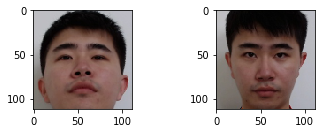

In [5]:
%matplotlib inline
plot_images([face_align_dic['jinlk'][0], face_align_dic['jinlk'][1]])

In [6]:
feat_test1 = l2_norm1(model_IR_50(img2tensor(face_align_dic['jinlk'][0])))
feat_test2 = l2_norm1(model_IR_50(img2tensor(face_align_dic['jinlk'][1])))
print('similarity: {}'.format(feat_test1.detach().numpy().dot(feat_test2.detach().numpy().T)))

similarity: [[ 0.7341218]]


## 提前保存特征为npy格式，方便读取

In [7]:
# feat_align_dic = {}
# for name in tqdm.tqdm(face_align_dic):
#     feat_align_dic[name] = []
#     for i in range(face_align_dic[name].shape[0]):
#         each_feat = l2_norm1(model_IR_50(img2tensor(face_align_dic[name][i])))
#         feat_align_dic[name].append(each_feat)

In [8]:
# for name in feat_align_dic:
#     tf_np = []
#     tf_np.clear()
#     for i in range(len(feat_align_dic[name])):
#         tf_np.append(feat_align_dic[name][i].detach().cpu().numpy())
#     tf_np = np.array(tf_np)
#     print(tf_np.shape)
#     np.save('./numpy_data/'+name+'tf.npy', tf_np)

In [9]:
feat_align_dic = {}
feat_single_dic = {}
for name in name_list:
    feat_align_dic[name] = np.load('./numpy_data/'+name+'tf.npy')
    feat_single_dic[name] = np.mean(feat_align_dic[name], axis=0)

In [10]:
for name in face_align_dic:
    print('name:{}, data shape:{}'.format(name, feat_align_dic[name].shape))
#     print(feat_single_dic[name])

name:chengqiang, data shape:(44, 1, 512)
name:liuyl, data shape:(51, 1, 512)
name:za, data shape:(72, 1, 512)
name:jianyc, data shape:(55, 1, 512)
name:zhulq, data shape:(51, 1, 512)
name:jinlk, data shape:(54, 1, 512)
name:wangqf, data shape:(65, 1, 512)
name:zhangwt, data shape:(72, 1, 512)
name:wt, data shape:(132, 1, 512)
name:qiuhy, data shape:(57, 1, 512)
name:byx, data shape:(86, 1, 512)
name:fusl, data shape:(49, 1, 512)
name:zyy, data shape:(62, 1, 512)
name:xujc, data shape:(56, 1, 512)
name:guoth, data shape:(70, 1, 512)
name:djw, data shape:(88, 1, 512)
name:xingyc, data shape:(46, 1, 512)
name:wat, data shape:(72, 1, 512)
name:lxj, data shape:(81, 1, 512)


# DDN攻击过程
### 需要修改./fast_adv下的ddn文件

In [11]:
from fast_adv.attacks import DDN, CarliniWagnerL2
from fast_adv.utils import requires_grad_, l2_norm
import os
import cv2

def ddn_attack(model, attack_img, input_feat, target_feat):
    model.to(device)
    attack_img = img2tensor(attack_img).to(device)
    target_feat = torch.from_numpy(target_feat).to(device)
    input_feat = input_feat.detach().to(device)
    attacker = DDN(steps=50, device=device)
    
    attacked_img = attacker.attack(model=model, inputs=attack_img, inputs_labels=input_feat,
                                   labels=target_feat, threshold=0.8, targeted=True)
    return attacked_img

def makedir(path):
    if not os.path.exists(path):
        os.makedirs(path)
        print('{} is maked'.format(path))
        
def L1(yhat, y):
    loss = np.mean(np.abs(y - yhat))
    return loss
 
def L2(yhat, y):
    loss = np.mean(np.power((y - yhat), 2))
    return loss

def Lmax(yhat, y):
    loss = np.max(np.abs(y - yhat))
    return loss

def get_most_similar(feat, feat_single_dic):
    best_score1 = 0
    best_score2 = 0
    best_name1 = ''
    best_name2 = ''
    feat = feat.detach().cpu().numpy()
    for name in feat_single_dic:
        score = feat_single_dic[name].dot(feat.T)
        if score > best_score1:
            best_score1 = score
            best_name1 = name
    for name in feat_single_dic:
        score = feat_single_dic[name].dot(feat.T)
        if (score > best_score2)and(name!=best_name1):
            best_score2 = score
            best_name2 = name
    return best_name2#, best_score2
        
# a, b = get_most_similar(feat_single_dic['jinlk'], feat_single_dic)
# print(a, b)

## 单张攻击效果

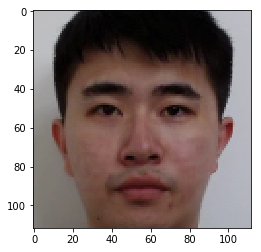

In [12]:
model_IR_50.to(device)
test_feat = l2_norm1(model_IR_50(img2tensor(face_align_dic['jinlk'][10]).cuda()))
attacked_img = ddn_attack(model_IR_50, face_align_dic['jinlk'][10], test_feat, 
                          feat_single_dic[get_most_similar(test_feat, feat_single_dic)])
plt.imshow(tensor2img(attacked_img.detach().cpu()).astype(np.uint8))

## 批量攻击效果

In [13]:
count = 0
name_data_list = [x.split('/')[-2] for x in face_data]
for each_face_data, name in zip(face_data, name_data_list):
    count += 1
    PIL_img = Image.open(each_face_data)
    each_face_align = align_face(PIL_img, size=(112, 112))
    ori_feat = l2_norm1(model_IR_50(img2tensor(each_face_align).cuda()))
    target_name = get_most_similar(ori_feat, feat_single_dic)
    
    attacked_img = ddn_attack(model=model_IR_50, attack_img=each_face_align,
                    input_feat=ori_feat,
                    target_feat=feat_single_dic[target_name])
    
    np_img = tensor2img(attacked_img.detach().cpu()).astype(np.uint8)
    com_feat = l2_norm1(model_IR_50(img2tensor(np_img).cuda()))
    
    print('index:{}, similarity:{}, L:{}, target:{}'.format(
        count,feat_single_dic[target_name].dot(com_feat.detach().cpu().numpy().T),
        L2(each_face_align, np_img), target_name))
    
    each_save_path = each_face_data.replace(
        '.jpg', '_{}.jpg'.format(target_name)).replace('face_data', 'Users/jinlk/fake_face')
    makedir(each_save_path.rsplit('/', 1)[0])
    cv2.imwrite(each_save_path, cv2.cvtColor(np_img,cv2.COLOR_BGR2RGB))

/home/jinlukang/Deecamp/Users/jinlk/Face_Reco/align/first_stage.py:32: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img = Variable(torch.FloatTensor(_preprocess(img)), volatile = True)
/home/jinlukang/Deecamp/Users/jinlk/Face_Reco/align/get_nets.py:70: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/home/jinlukang/Deecamp/Users/jinlk/Face_Reco/align/detector.py:79: UserWarning: volatile was removed and now has no effect. Use `with torch.no_grad():` instead.
  img_boxes = Variable(torch.FloatTensor(img_boxes), volatile = True)
/home/jinlukang/Deecamp/Users/jinlk/Face_Reco/align/get_nets.py:115: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  a = F.softmax(a)
/home/jinlukang/Deecamp/Users/jinlk/Face_Reco/align/detector.py:100: UserWarning: volatile was removed and now has 

index:1, similarity:[[ 0.80244088]], L:5.664647108843537, target:qiuhy
index:2, similarity:[[ 0.804479]], L:8.604166666666666, target:qiuhy
index:3, similarity:[[ 0.8010115]], L:6.641634778911564, target:qiuhy
index:4, similarity:[[ 0.8005712]], L:5.214471726190476, target:qiuhy
index:5, similarity:[[ 0.80172819]], L:4.987244897959184, target:qiuhy
index:6, similarity:[[ 0.8022002]], L:7.334715136054422, target:qiuhy
index:7, similarity:[[ 0.80253077]], L:7.312260841836735, target:qiuhy
index:8, similarity:[[ 0.80170363]], L:5.573421556122449, target:qiuhy
index:9, similarity:[[ 0.80161053]], L:5.062739158163265, target:qiuhy
index:10, similarity:[[ 0.80286312]], L:6.090826955782313, target:qiuhy
index:11, similarity:[[ 0.80391359]], L:5.590428358843537, target:qiuhy
index:12, similarity:[[ 0.80145979]], L:6.098267431972789, target:qiuhy
index:13, similarity:[[ 0.80157816]], L:6.0867612670068025, target:qiuhy
index:14, similarity:[[ 0.80027544]], L:7.826902636054422, target:qiuhy
index